In [ ]:

#  데이터 탐색 (EDA) Exploratory Data Analysis 탐색적 데이터 분석
# 데이터를 처음 받았을 때, 이 데이터가 어떤 구조고, 어떤 문제 있고, 어떤 패턴 있는지 “정찰(Scout)” 하는 과정
# 데이터의 상태를 파악하는 기초 점검 + 패턴 발견 과정

In [4]:
import pandas as pd
import os
os.chdir(r"C:\Users\PC\Desktop\DEP\marketing_roas")

# 1단계 데이터 기본 정보 확인

In [10]:
df = pd.read_csv("data/raw/train.gz", compression="gzip", nrows=500000)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("시작")

print("\n[1] 데이터 크기(shape): (행 수, 열 수)")
print(df.shape)

print("\n[2] 데이터 상위 5행(head):")
print(df.head())

print("\n[3] 데이터 정보(info):")
df.info()


시작

[1] 데이터 크기(shape): (행 수, 열 수)
(500000, 24)

[2] 데이터 상위 5행(head):
             id  click      hour    C1  banner_pos   site_id site_domain  \
0  1.000009e+18      0  14102100  1005           0  1fbe01fe    f3845767   
1  1.000017e+19      0  14102100  1005           0  1fbe01fe    f3845767   
2  1.000037e+19      0  14102100  1005           0  1fbe01fe    f3845767   
3  1.000064e+19      0  14102100  1005           0  1fbe01fe    f3845767   
4  1.000068e+19      0  14102100  1005           1  fe8cc448    9166c161   

  site_category    app_id app_domain app_category device_id device_ip  \
0      28905ebd  ecad2386   7801e8d9     07d7df22  a99f214a  ddd2926e   
1      28905ebd  ecad2386   7801e8d9     07d7df22  a99f214a  96809ac8   
2      28905ebd  ecad2386   7801e8d9     07d7df22  a99f214a  b3cf8def   
3      28905ebd  ecad2386   7801e8d9     07d7df22  a99f214a  e8275b8f   
4      0569f928  ecad2386   7801e8d9     07d7df22  a99f214a  9644d0bf   

  device_model  device_type  device

# 2단계: 통계 및 분포 분석

In [18]:
# 1. 기본 통계
print("=" * 50)
print("기본 통계")
print("=" * 50)
print(df.describe(include='all'))

# 2. Null 값 확인
print("\n" + "=" * 50)
print("Null 값 확인")
print("=" * 50)
print(df.isnull().sum())

# 3. Target 분포 (click)
print("\n" + "=" * 50)
print("Target 분포 (click)")
print("=" * 50)
print(df['click'].value_counts())
print(f"CTR: {df['click'].mean()*100:.2f}%")

# 4. 컬럼별 고유값 개수
print("\n" + "=" * 50)
print("컬럼별 고유값 개수")
print("=" * 50)
print(df.nunique())

기본 통계
                  id          click          hour             C1  \
count   5.000000e+05  500000.000000  5.000000e+05  500000.000000   
unique           NaN            NaN           NaN            NaN   
top              NaN            NaN           NaN            NaN   
freq             NaN            NaN           NaN            NaN   
mean    9.314806e+18       0.164074  1.410210e+07    1005.034018   
std     5.213424e+18       0.370343  9.156416e-01       0.966678   
min     9.984920e+12       0.000000  1.410210e+07    1001.000000   
25%     4.828050e+18       0.000000  1.410210e+07    1005.000000   
50%     9.794425e+18       0.000000  1.410210e+07    1005.000000   
75%     1.347337e+19       0.000000  1.410210e+07    1005.000000   
max     1.844670e+19       1.000000  1.410210e+07    1012.000000   

           banner_pos   site_id site_domain site_category    app_id  \
count   500000.000000    500000      500000        500000    500000   
unique            NaN      1704    

# 3단계 시각화

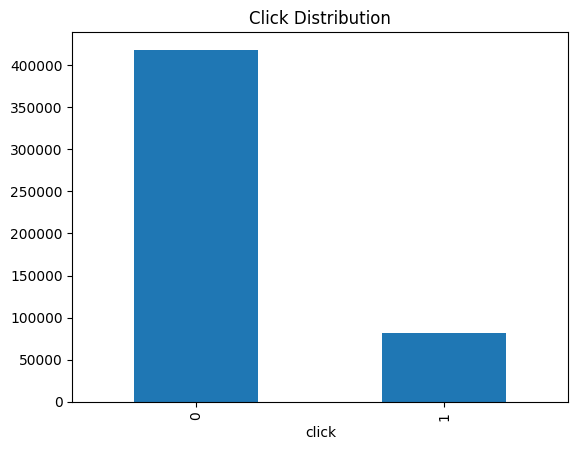

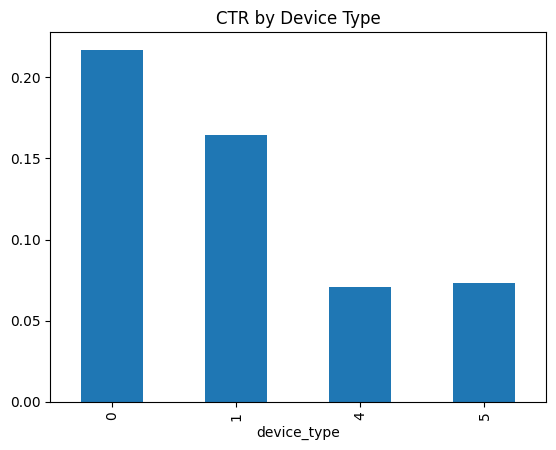

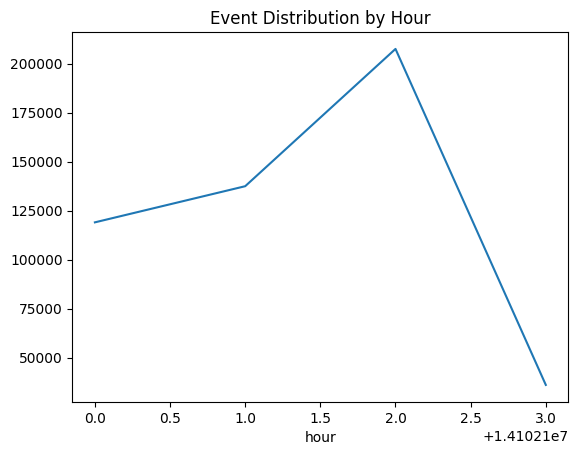

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'DejaVu Sans'

# 클릭 분포
df['click'].value_counts().plot(kind='bar', title='Click Distribution')
plt.show()

# 기기 타입별 CTR
df.groupby('device_type')['click'].mean().plot(kind='bar', title='CTR by Device Type')
plt.show()

# 시간대별 이벤트 분포
df['hour'].value_counts().sort_index().plot(title='Event Distribution by Hour')
plt.show()

# 4단계 샘플링

샘플링 = 큰 데이터에서 랜덤으로 일부만 뽑는 것

In [33]:
from sklearn.model_selection import train_test_split

# 스트래티파이드 샘플링 (클릭 비율 유지)
for size, name in [(1000, '1k'), (10000, '10k'), (50000, '50k')]:
    # train_test_split 사용
    sample, _ = train_test_split(df, train_size=size, random_state=42, stratify=df['click'])
    sample.to_csv(f'data/sample/train_sample_{name}.csv', index=False)
    print(f"✓ train_sample_{name}.csv 생성 완료 (행 수: {len(sample)})")

# 확인: 생성된 샘플의 CTR 비교
print("\n=== 샘플별 CTR 비교 ===")
print(f"원본 데이터 CTR: {df['click'].mean()*100:.2f}%")
for size, name in [(1000, '1k'), (10000, '10k'), (50000, '50k')]:
    sample = pd.read_csv(f'data/sample/train_sample_{name}.csv')
    ctr = sample['click'].mean() * 100
    print(f"train_sample_{name}.csv CTR: {ctr:.2f}%")

✓ train_sample_1k.csv 생성 완료 (행 수: 1000)
✓ train_sample_10k.csv 생성 완료 (행 수: 10000)
✓ train_sample_50k.csv 생성 완료 (행 수: 50000)

=== 샘플별 CTR 비교 ===
원본 데이터 CTR: 16.41%
train_sample_1k.csv CTR: 16.40%
train_sample_10k.csv CTR: 16.41%
train_sample_50k.csv CTR: 16.41%
